In [1]:
import sys
sys.path.append('../src/')
#from vi_hrg_log1pexp import *
from vi_hrg_fix import *
from utils import *
from torch import autograd
torch.manual_seed(88)

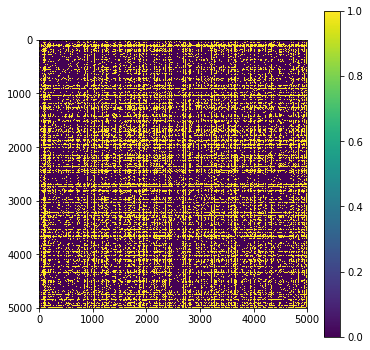

In [2]:
N = 5000
R = torch.tensor([8.0]).double()
alpha = torch.tensor([0.2]).double()
T = torch.tensor([0.2]).double()

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
r, theta, A = r.float(), theta.float(), A.float()
G.show()
#G.plot()

### True values

In [3]:
tv = hrg_likelihood(A, r, theta, R, T, alpha, debug=False)
tv

-3269224.186579844

In [4]:
#Rs = torch.arange(6., 10.5, 0.5)
Ts = torch.arange(0.02, 0.42, 0.02)
alphas = torch.arange(.02, 1.02, .02)

In [5]:
lh_a = []
for a in alphas:
    lh_ =[]
    for t in Ts:
        lh_.append(hrg_likelihood(A, r, theta, R, t, a, debug=False))
    lh_a.append(lh_)

In [6]:
#lh_a = np.load('paramsearchTa_n5000_R8_T03_a055.npy')

In [33]:
lh_a = np.array(lh_a)
lh_clampd = torch.clamp(torch.tensor(lh_a), min=-0.34*1e+7)

In [34]:
#np.save('paramsearchTa_n5000_R8_T02_a02.npy', lh_a)

In [35]:
#levels = [-1960, -1980, -2000, -2500, -3000, -3500, -4000, -5000, -6000, -10000]

In [36]:
max_index = np.unravel_index(lh_a.argmax(), lh_a.shape)
a_max = alphas[max_index[0]].item()
T_max = Ts[max_index[1]].item()
a_max, T_max

(0.1599999964237213, 0.20000000298023224)

In [37]:
max_index

(7, 9)

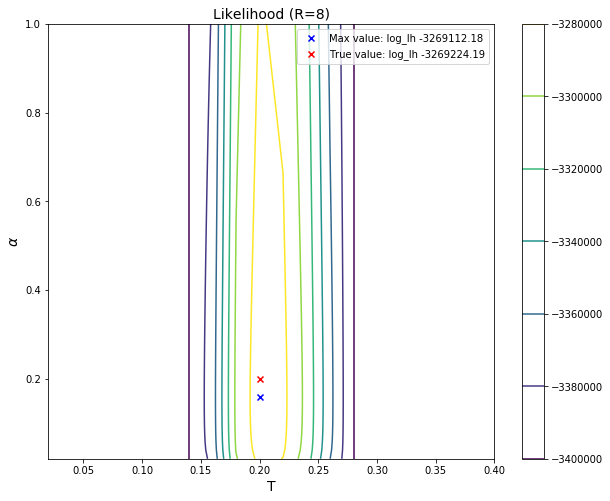

In [38]:

plt.figure(figsize=(10,8))
im = plt.contour(Ts.numpy(), alphas.numpy(), lh_clampd, alpha=1.)
plt.scatter(T_max, a_max, color='blue', marker='x', label=str('Max value: log_lh %.2f' % lh_clampd.max().item()))
plt.scatter(T.numpy(), alpha.numpy(), color='red', marker='x', label=str('True value: log_lh %.2f' % tv))
plt.title('Likelihood (R=8)', fontsize=14)
plt.xlabel('T', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)
plt.colorbar(im)
plt.legend()
plt.show()

In [19]:
lh_clampd.max(), lh_clampd[max_index]

(tensor(-3269112.1825, dtype=torch.float64),
 tensor(-3269112.1825, dtype=torch.float64))